# Table of Contents

1. [Introduction](#introduction)

2. [Dataset Description](#dataset_description)
 
3. [Problem Formulation](#problem_formulation)

4. [Performance Metrics](#performance_metrics)

5. [Data Manipulation and Exploratory Data Analysis (EDA)](#manipulation_eda)
       
6. [Model Development](#model_development)
               
7. [Model Evaluation and Hyperparameter Tuning](#model_evaluation)
    
8. [Conclusions and Recommendations](#conclusions)

9. [References](#references)
        

# Introduction <a class="anchor" id="introduction"></a>

Electricity Price Forecasting (EPF) focuses on predicting the prices in wholesale electricity markets. Electricity is generally traded under market rules throughout North America, Europe, and Australia. However, compared to other commodities, electricity is unique because it is not economically storable, and its demand depends on weather, and the intensity of business and everyday activities. These factors lead to unique price dynamics, exhibiting daily, weekly, and often annual seasonality, as well as unanticipated price spikes. 

The cost of over-contracting or under-contracting and then selling/buying power in the balancing market are typically so high that they can lead to significant financial losses. Thus, electricity price forecasts have become a fundamental input to energy companies’ decision-making process. By predicting volatile wholesale prices with reasonable level of accuracy, energy companies and other stakeholders can adjust their bidding strategy and their own production or consumption schedule to reduce risks and maximize profits. [1]

The aim of this report is to use supervised learning algorithms to predict electricity prices using a public dataset from Cork Airport in Ireland containing information about weather, time of year, and system load. In Section 2, the features of the dataset are explored; Section 3 relates to the problem definition, and some of the assumptions required for the project; Section 4 defines the evaluation metrics for the model; In Section 5, the Exploratory Data Analysis is presented; In Section 6, the model is developed using machine learning; Section 7 describes the evaluation of the model and a discussion of results; Section 8 provides the reader with conclusions and recommendations for future work; Lastly, references are shown in Section 9.


# Dataset Description <a class="anchor" id="dataset_description"></a>

The dataset was posted on [Kaggle](https://www.kaggle.com/salilchoubey/electrity-prices/download)  by user Salil Choubey. The dataset contains the price of electricity for a data center as well as factors that might affect the price. It has 18 columns in total, one of them being the label. The description provided for each column is shown below

| Feature | Description  | Desired Data Type |
|------|------|------|
|  DateTime | Defines date and time of sample| DateTime |
|Holiday |Name of holiday if day is a bank holiday| String |
|HolidayFlag|1 if day is a bank holiday, 0 otherwise| Category |
|DayOfWeek|Integer (0-6), 0 monday, day of week| Category |
|WeekOfYear|Running week within year of this date| Category |
|Day|Day of the date| Category |
|Month|Month of the date| Category |
|Year|Year of the date| Category |
|PeriodOfDay|Denotes half hour period of day (0-47)| Category |
|ForecastWindProduction|The forecasted wind production for this period| Category |
|SystemLoadEA|The national load forecast for this period| Float |
|SMPEA|The price forecast for this period| Float |
|ORKTemperature|The actual temperature measured at Cork airport| Float |
|ORKWindspeed|The actual windspeed measured at Cork airport| Float |
|CO2Intensity|The actual CO2 intensity in (g/kWh) for the electricity produced| Float |
|ActualWindProduction|The actual wind energy production for this period| Float |
|SystemLoadEP2|The actual national system load for this period| Float |
|SMPEP2|The actual price of this time period, the value to be forecasted| Float |


# Problem Formulation <a class="anchor" id="problem_formulation"></a>

This is a forecast problem of a continuous variable. As such, one can use Supervised Machine Learning methods to analyze historical data to predict electricity prices. The following steps will be taken in the next sections to analyze the data:

1. Data Management: cleaning the data and properly identifying data types

2. Exploratory Data Analysis (EDA) and Statistical Experimentation: preliminary results, identify features that impact electricity price the most

3. Model Development: develop preliminary models for electricity price prediction using a training dataset

4. Model Evaluation and Tuning: optimize the model to obtain the most accurate electricity price prediction

# Performance Metrics <a class="anchor" id="performance_metrics"></a>
The information for the expected performance was not included in the dataset description. However, since the dataset includes the actual electricity price as well as its forecasted values it can assumed the stakeholders have a model already. Thus, for this project, success is defined as a improved performance from the forecast provided by original dataset. For regression problems, these are the typical performance metrics [2]:

* **Mean Squared Error (MSE)**: Average of the square errors from the regression (i.e., how far from the true electricity price is the model prediction)
* **Root Mean Squared Error(RMSE)**: Root square of MSE, sensitive to outliers. 
* **Mean Absolute Error(MAE)**: Absolute difference between the target value and the value predicted by the model. Robust to outliers and can be easily interpreted, similarly to RMSE. For example, a MAE of 20 indicates our predicted electricity price is 20 unit prices away from the true value, on average
* **R² Error**: Measures how much variability from the data is explained by the model. For example, a value of 50% indicates the model accounts for 50% in the electricity price variability


# Data Manipulation and Exploratory Data Analysis (EDA) <a class="anchor" id="manipulation_eda"></a>

In this section, the structure of the dataset, the distribution of individual variables, and the relationship between the variables are examined. The main goals of the exploratory data analysis (EDA) are: 

* Determine whether there are problems with the dataset
* Determine whether the project question can be answered with the data that is available
* Develop a scketch for the project question

In [1]:
#Import the modules for EDA, Data manipulation, Algebra, Stats, and visualization
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the dataset as df, drop NaN values and print dataframe shape
url = 'https://raw.githubusercontent.com/datacamp/careerhub-data/master/Electricity%20Prices/electricity_prices.csv'
df =  pd.read_csv(url, na_values='?').dropna()
df.shape

(37682, 18)

In [3]:
#Convert columns to category types and check for duplicates
to_category = ['HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay']

df[to_category] = df[to_category].astype('category')
    
assert df.duplicated().sum() == 0

## Numerical Variables Analysis

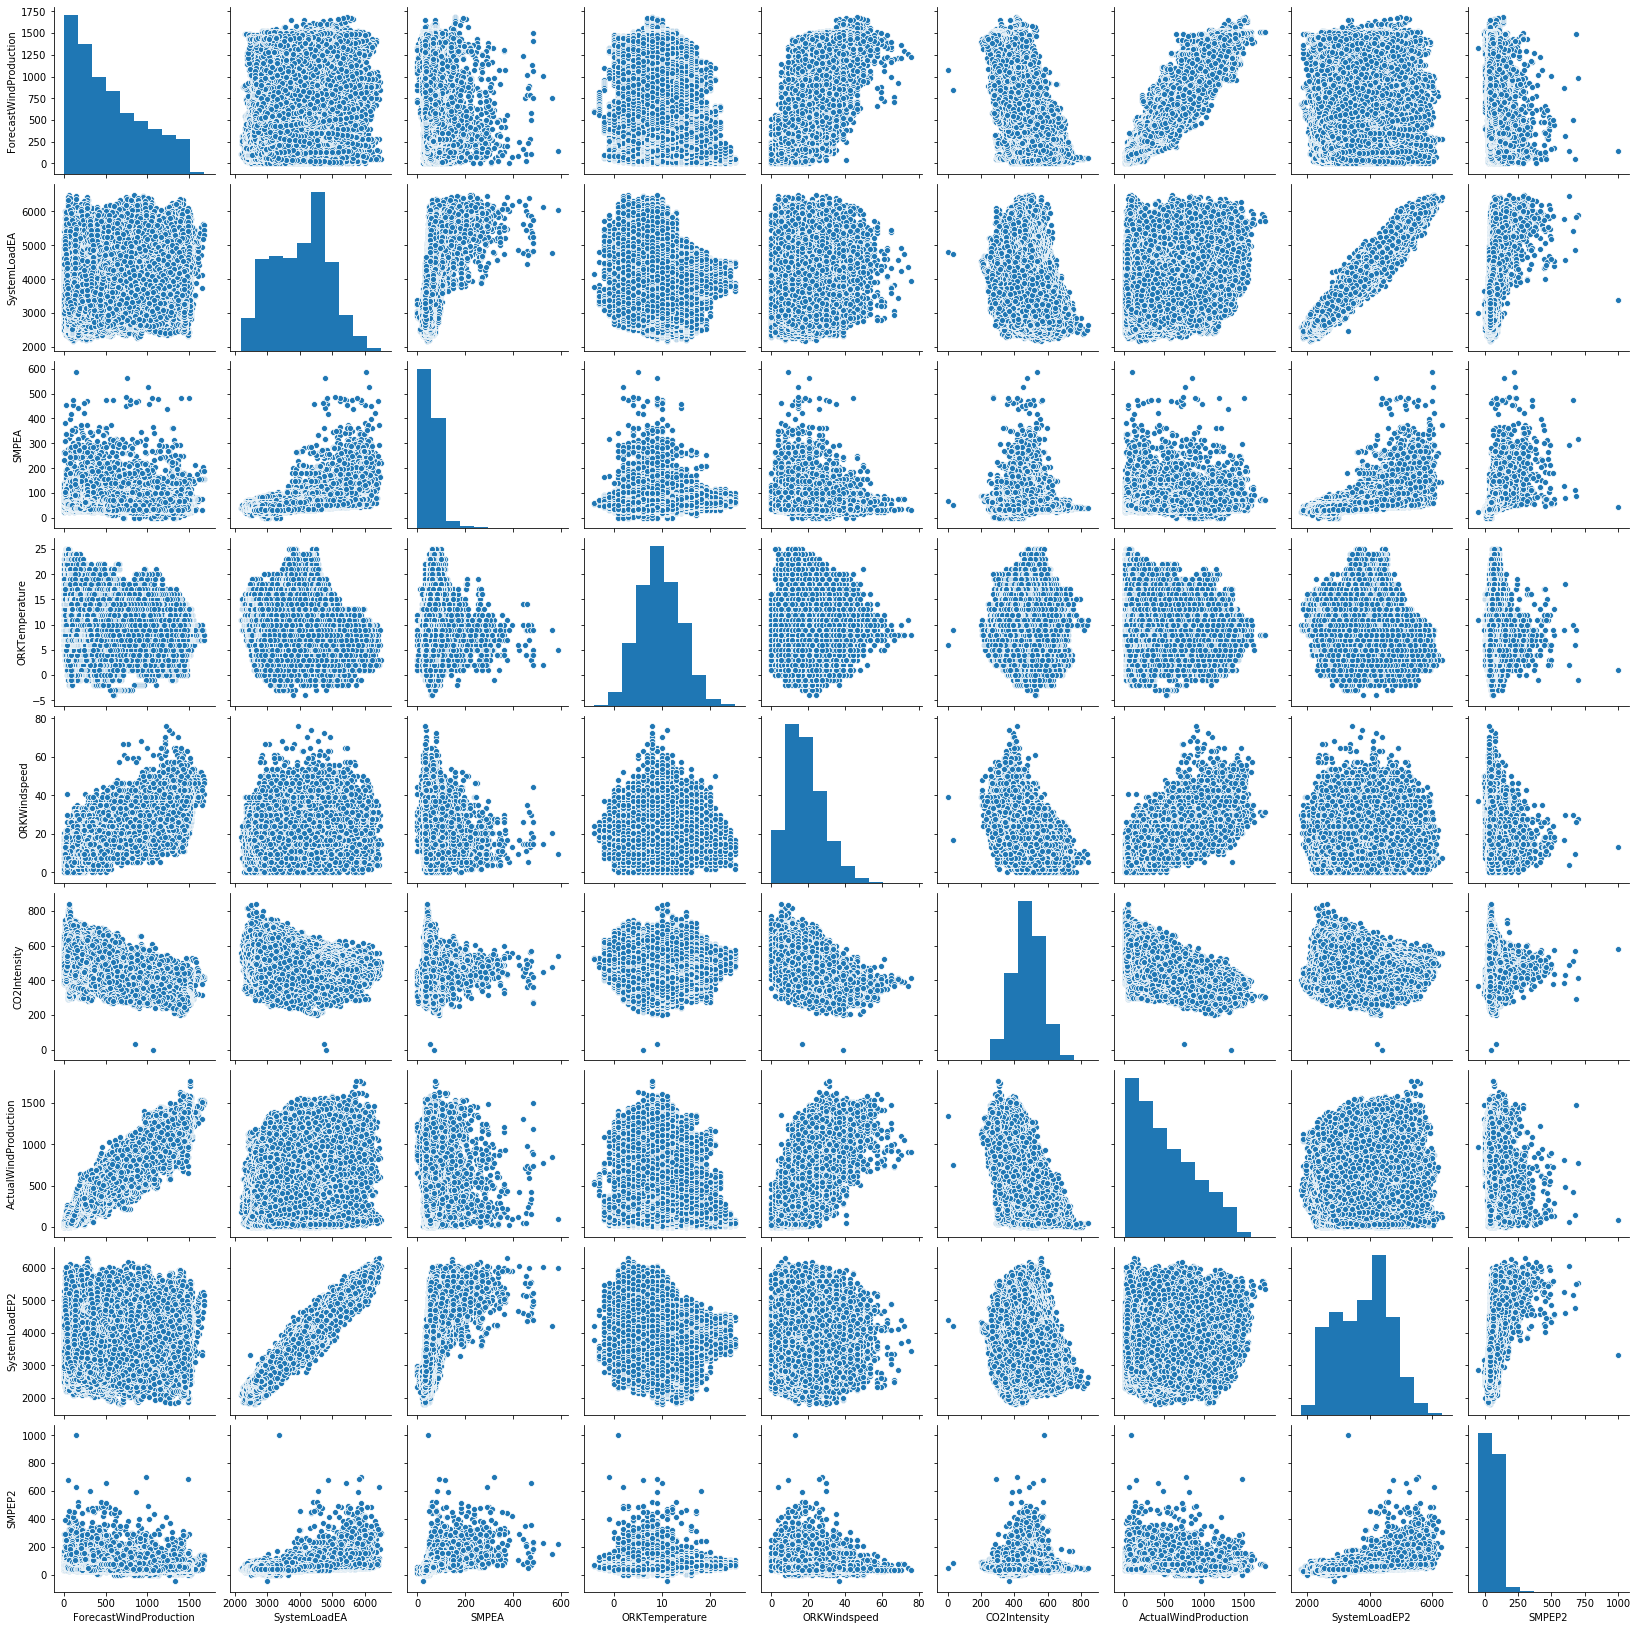

In [4]:
#Select the numeric columns and plot the bivariate analysis
df_num = df[['ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2']]
sns.pairplot(df_num)
plt.show()

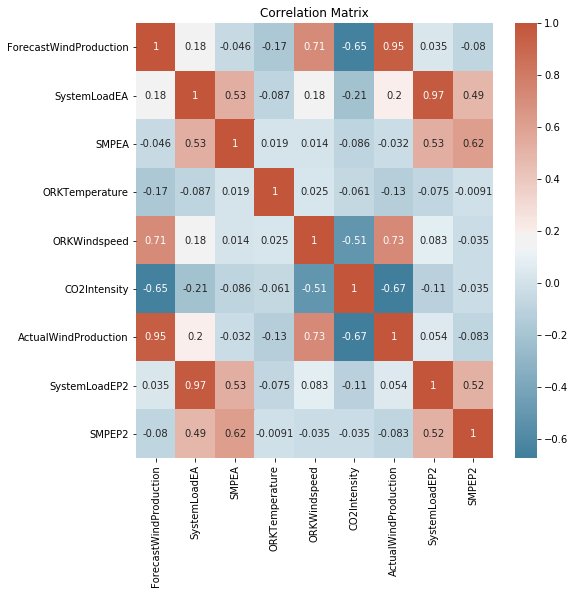

In [5]:
# Calculate the correlation coefficients
corr = df_num.corr()
#Create the heat map
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#Set the figure size
plt.subplots(figsize=(8,8)) 
#Set and show the plot
sns.heatmap(corr, cmap=cmap, annot=True)
plt.title('Correlation Matrix')
plt.show()

The pairplot and the correlation matrix show that, as expected, numerical variables that have Forecasted and Actual values are strongly correlated. In addition, the label, *SMPEP2*, is moderately correlated to the forecasted values *SMPEA* and to *SystemLoadEP2* with correlation coefficients of 0.62 and 0.52 respectively.

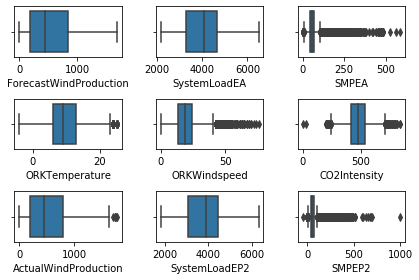

In [6]:
#identify outliers using boxplots for the numeric features
f, axes = plt.subplots(3, 3)  
y = 0;
#Loop over all numeric columns and create the boxplot
for column in df_num:
    i, j = divmod(y, 3)
    sns.boxplot(x=df_num[column], ax=axes[i, j])
    y = y + 1

plt.tight_layout()
plt.show()

From the plots above, it is shown that several columns have outliers using the interquartile (IQR) criteria from the boxplots. Notably, the label, SMPEP2, and its forecasted values, SMPEA, have  a high number of outliers. However, it is not uncommon to have price surges in electricity [1] and the fact that both the forecasted and the actual values have similar distributions speaks to the volatility of these variables.

However, one must be cautious since the goal for the model is to be generalizable to new data, in that sense outliers can make the model prone to overfitting. For this reason and because this is a proof-of-concept project, they will be removed using the IQR criteria.

In [7]:
#Remove the outliers using the IQR criteria
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

IQR = Q3 - Q1

df = df.loc[~((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

## Categorical Variables 

As mentioned before, several features were coded as 'category' data type. Particularly, the date has been decomposed in several columns or features: *'DayOfWeek', 'WeekOfYear', 'Day', 'Month', 'Year', 'PeriodOfDay'*. With these features the following questions can be explored:

* Has the electricity price increased each year?
* Does electricity price change month to month?
* Is the electricity price different between each day of the week?
* Does the period of day have any effect on electricity pricing? 

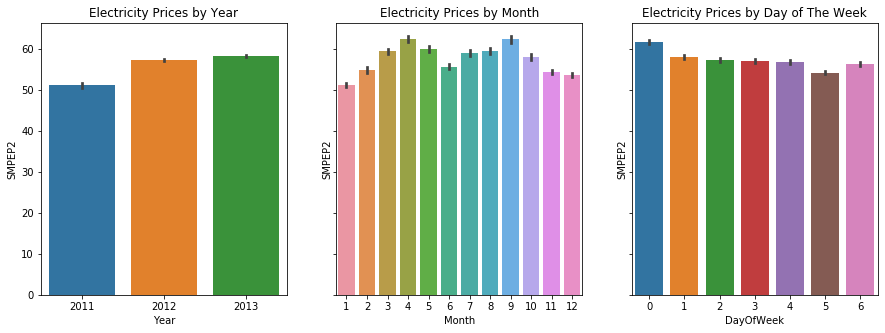

In [8]:
#Create a grid with 3 barplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

#Create a categorical box plot to evaluate electricity price in relation to the type of holiday or not a holiday
sns.barplot(ax=axes[0], data=df, x='Year', y='SMPEP2')
axes[0].set_title('Electricity Prices by Year')

# Show the average electricity price per month
sns.barplot(ax=axes[1], data=df, x='Month', y='SMPEP2')
axes[1].set_title('Electricity Prices by Month')

# Show the average electricity price per day of the week
sns.barplot(ax=axes[2], data=df, x='DayOfWeek', y='SMPEP2')
axes[2].set_title('Electricity Prices by Day of The Week')
plt.show()

The three plots from above show the behaviour of the electricity price by year, month and day of the week, respectively. It is shown that electricity prices increased each year. This in interesting because Ireland had a decrease in energy consumption and household electricity prices during the same period [3, 4]. For the monthly prices, it is shown that the electricity price peaks, on average, during April and September and the lowest during January. This might imply seasonality in the price data. Lastly, the electricity prices by day of the week plot show that the prices are higher, on average, during Mondays.  

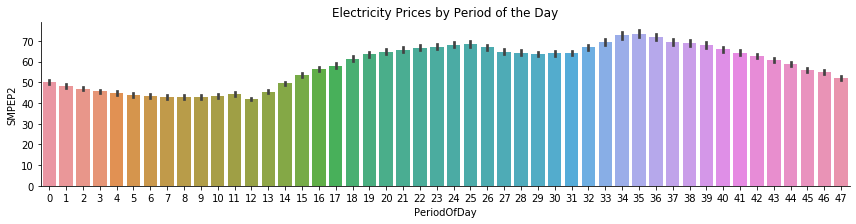

In [9]:
#Show the average electricity price per period of the day
fig = sns.catplot(data=df, x='PeriodOfDay', y='SMPEP2', kind="bar", height = 3, aspect = 4)
plt.title('Electricity Prices by Period of the Day')
plt.show()

The prices for the period of the day show that the prices are higher during the periods 33 to 37, which translates to 16:30 to 18:30 in time of day. 

The dataset description does not provide context about consumer demographics (industrial, household, etc.). However, the trends observed during EDA seem reasonable.

# Model Development <a class="anchor" id="model_development"></a>

As mentioned in the problem formulation, this is regression problem. There are a few approaches one can take for EPF [1]. This project is focused in using Machine Learning regression algorithms to predict the electricity prices. The following assumptions are considered: 

* The project will be considered a success if the performance metrics are better than the pre-existing model (i.e., comparing *'SMPEP2'* and *'SMPEA'*)
* The DateTime column will not be included in the analysis since it has been decomposed in categories (i.e., *'Month'*, *'Day'*, *'Year'*, columns)
* The *'SMPEA'* constitutes the forecast for the label, *'SMPEP2'*. Thus, it cannot be included in the model
* The rest of the forecasted variables will be removed from the analysis to simplify the model

## Baseline Metrics

As mentioned before, the dataset description implies the existence of a model given that *'SMPEA'* is the forecasted value of our label *'SMPEP2'*. The regression metrics, shown in Section 4, between these columns can be calculated and used as a baseline. For code reusability, a function that calculates and displays the metrics is shown below.


In [10]:
#Write a function that calculates and displays MSE, RMSE, MAE, and R² Error
from sklearn import metrics

def regression_metrics (y_true, y_pred):
    """
    Calculates and prints MSE, RMSE, MAE, and R² Error    
    """
    print('Mean Squared Error: ', np.round(metrics.mean_squared_error(y_true, y_pred),3), '|',
         'Root Mean Squared Error: ', np.round(metrics.mean_squared_error(y_true, y_pred)**0.5, 3))
    print('Mean Absolute Error: ', np.round(metrics.mean_absolute_error(y_true, y_pred), 3), '|',
            'R² Error: ', np.round(metrics.r2_score(y_true, y_pred),3)) 

In [11]:
regression_metrics(df['SMPEP2'], df['SMPEA'])

Mean Squared Error:  214.967 | Root Mean Squared Error:  14.662
Mean Absolute Error:  10.113 | R² Error:  0.305


## Multivariate Model 

In [12]:
#Import modules for Linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#Select features and the label. Do not include forecasted variables (i.e. 'ForecastWindProduction', 'SystemLoadEA', 'SMPEA')

X = df[['DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay',
       'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2']]

y = df['SMPEP2']

In [13]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.3, random_state=42)

lr = LinearRegression()
#fit the model
lr.fit(X_train, y_train)
#predict using the training set and check scores
y_pred_train = lr.predict(X_train)

regression_metrics(y_train, y_pred_train)

Mean Squared Error:  193.42 | Root Mean Squared Error:  13.908
Mean Absolute Error:  10.701 | R² Error:  0.373


As show above, the regression model with default parameters performs slightly better than the baseline in terms of the MSE, RSME, and R squared and slightly worse with MAE. The table below shows a comparison of the metrics

| Metric | Baseline  | Linear Regression |
|------|------|------|
|  MSE | 214.966 | 193.420 |
|  RMSE | 14.662 | 13.908 |
|  MAE | 10.113 | 10.701 |
|  R² | 0.305 | 0.373 |


## Ensemble Models 

Ensemble models use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone [5]. In this case, the Random Forest and Gradient Boosting algorithms will be tested.

### Random Forest Regressor  

In [14]:
#Import Random Forest
from sklearn.ensemble import RandomForestRegressor
# Instantiate a random forests regressor 'rf' 100 estimators
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit 'rf' to the training set
rf_model = rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_train)
regression_metrics(y_train, y_pred)

Mean Squared Error:  8.985 | Root Mean Squared Error:  2.997
Mean Absolute Error:  1.944 | R² Error:  0.971


The random forest model performs significantly better than the linear regression models, increasing the R square by more than 50%. Using the <code>.feature_importances_</code> method, the features can be ranked in order of importance.

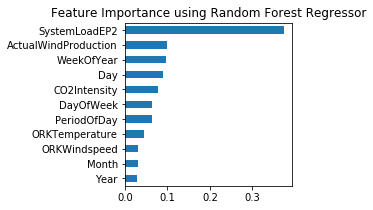

In [15]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns).sort_values()
# Make a horizontal bar plot
plt.figure(figsize=(3,3))
importances_rf.plot(kind='barh')

plt.title('Feature Importance using Random Forest Regressor')
plt.show()

The figure above shows the feature importance when using the Random Forest regressor to predict electricity prices. *'SystemLoadEP2'* is the most important feature, followed by *'ActualWindProduction'* and *'WeekOfYear*'.

### Gradient Boosting Regressor 

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
#Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=100, max_depth=9, random_state=42)
# Fit 'gbt' to the training set
gbt_model = gbt.fit(X_train, y_train)
# Predict the training set labels
y_pred = gbt.predict(X_train)

regression_metrics(y_train, y_pred)

Mean Squared Error:  27.453 | Root Mean Squared Error:  5.24
Mean Absolute Error:  3.756 | R² Error:  0.911


As shown above, both Random Forest and Gradient Boosting outperformed the linear regression model. However, this increase in performance comes with an increase in demand of computational power. Since the random forest regressor had the best scores of the ensemble models, it will be evaluated and optimized in the next section. 

# Model Evaluation and Hyperparameter Tuning <a class="anchor" id="model_evaluation"></a>

The previous section showed the ensemble models outperformed the linear regression models by as much as 50% using the training data set. The table below shows a summary of the metrics for each model,

| Metric | Baseline  | Linear Regression | Random Forest | Gradient Boosting |
|------|------|------|------|------|
|  MSE | 214.966 | 193.420| 8.974 | 27.453 |
|  RMSE | 14.662 | 13.908 | 3.000 | 5.240 |
|  MAE | 10.113 | 10.701 | 1.942 | 3.756 |
|  R² | 0.305 | 0.373 | 0.971 | 0.911 |


Based on those results the Random Forest will be evaluated with the test set and optimized accordingly. 

In [17]:
#evaluate rf with the test set
y_pred_test = rf.predict(X_test)
regression_metrics(y_test, y_pred_test)

Mean Squared Error:  62.85 | Root Mean Squared Error:  7.928
Mean Absolute Error:  5.199 | R² Error:  0.798


## Hyperparameter tuning 

In this section the hyperparameters of the random forest regressor are optimized in an effort to improve model performance. 

In [18]:
#hyperparameter tuning for random forest using Random Search
from sklearn.model_selection import RandomizedSearchCV

#Initialize the values to iterate for each hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [19]:
#WARNING: This cell takes up to 57 min to run with 4 cores
# Random search of parameters, using 3 fold cross validation, 
# Search across 80 different combinations, and use all available cores
rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 80,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='r2')

# Fit the random search model
rf_random.fit(X_train, y_train)

print(rf_random.best_params_)
print(rf_random.best_score_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 56.3min finished


{'n_estimators': 288, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
0.7888817198526046


In [20]:
#evaluate the rf model with optimized parameters
rf_tuned = RandomForestRegressor(n_estimators = 288, min_samples_split = 2, 
                                  min_samples_leaf = 1, random_state=42,
                                 max_features = 'sqrt', max_depth = None,
                                 bootstrap = False)

rf_tuned_m = rf_tuned.fit(X_train, y_train)

y_tuned = rf_tuned_m.predict(X_test)

regression_metrics(y_test, y_tuned)

Mean Squared Error:  50.6 | Root Mean Squared Error:  7.113
Mean Absolute Error:  4.507 | R² Error:  0.837


The table below shows a comparison of model performance before and after hyperparameter tuning, using the test set

| Metric | Baseline  |  Random Forest (default) | Random Forest (tuned) | 
|------|------|------|------|
|  MSE | 214.966 |62.791 | 50.182 
|  RMSE | 14.662 |7.924 | 7.084| 
|  MAE | 10.113 |5.202 | 4.485 | 
|  R² | 0.305 |0.798 | 0.839 | 

The model presented here outperformed the baseline model in all the regression metrics by as much as 50%. This model can be used by stakeholders to predict electricity prices more accurately, allowing them to plan business strategies and potentially saving a significant amount of money.

# Conclusions and Recommendations <a class="anchor" id="conclusions"></a>

The main goal of this project was to develop a model that could predict electricity prices from a given dataset using supervised learning algorithms as a proof-of-concept. To achieve this, the data were analyzed using a systematic approach: first the data were pre-processed and cleaned; then, consistent data types for features were selected; EDA was done to understand the data by evaluating both numerical and categorical variables; next, relevant features were chosen to develop several regression models; after comparing the model performance, the hyperparameters for the best performing model were tuned to improve accuracy. The main findings of this study can be summarized as follows:

* The correlation matrix showed that the electricity price was correlated the most with the national system load with a correlation coefficient of 0.52
* On average, electricity prices were increasing with time, contrary for Ireland's national pricing during the same period. This suggest there were other factors at play
* The monthly electricity prices have a wave-like trend, which implies seasonality
* On average, the electricity prices were higher during Monday and between 16:30 and 18:30 when splitting the data into daily and hour of the day, respectively
* The multivariate regression model outperformed the baseline metrics by about 7% for an accuracy score of 37%
* Ensemble models were evaluated to improve the prediction of electricity prices. Random Forest and Gradient Boosting regression were used
* The ensemble models outperformed the baseline metrics by about 50% when evaluating the training data
* The Randorm Forest Regressor was chosen as the final model achieving R² score of 83.9% after hyperparameter tunning 

The following recommendations are made for future studies:

* Additional statistical analysis can be made to the dataset for electricity price forecasting, such as similar-day exponential smoothing, and moving average predictions with time series analysis
* Other machine learning methods that can be used such as Neural Networks and XGBoost regression
* With more context about the dataset and stakeholders, a proper analysis of the trends observed during the EDA step can be made

# References <a class="anchor" id="references"></a>

[1] Weron, R. *Electricity price forecasting: A review of the state-of-the-art with a look into the future*. Intl J. of Forecasting. **2014**, 30, 1030-1081. 

[2] [Regression: An Explanation of Regression Metrics And What Can Go Wrong.](https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914) (Accessed June 14, 2021) 

[3] [Ireland: Energy Country Profile](https://ourworldindata.org/energy/country/ireland) (Accessed June 15, 2021) 

[4] [Electricity prices for households in Ireland from 2010 to 2020, semi-annually](https://www.statista.com/statistics/418082/electricity-prices-for-households-in-ireland/) (Accessed June 15, 2021)

[5] [Ensemble Learning](https://en.wikipedia.org/wiki/Ensemble_learning) (Accessed June 15, 2021) 
